In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("fcc-forum-pageviews.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [21]:
df.head(10)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
5,2016-05-14,3127
6,2016-05-15,2927
7,2016-05-16,2591
8,2016-05-17,3403
9,2016-05-18,5410


In [22]:
# df = df.set_index("date")

In [23]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [24]:
df.shape

(1304, 2)

In [34]:
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"],index_col="date")

In [35]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [36]:
df = df[
    (df["value"]>=df["value"].quantile(0.025))&
    (df["value"]<=df["value"].quantile(0.975))
]

In [37]:
df.shape

(1238, 1)

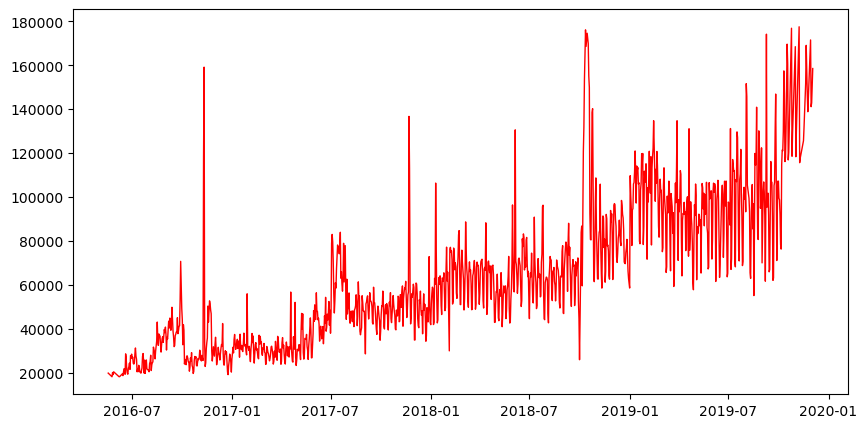

In [38]:
# fig represent the plot
# ax to edit 
fig , ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df["value"],"r",linewidth=1)

In [39]:
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

Text(4.444444444444452, 0.5, 'Page Views')

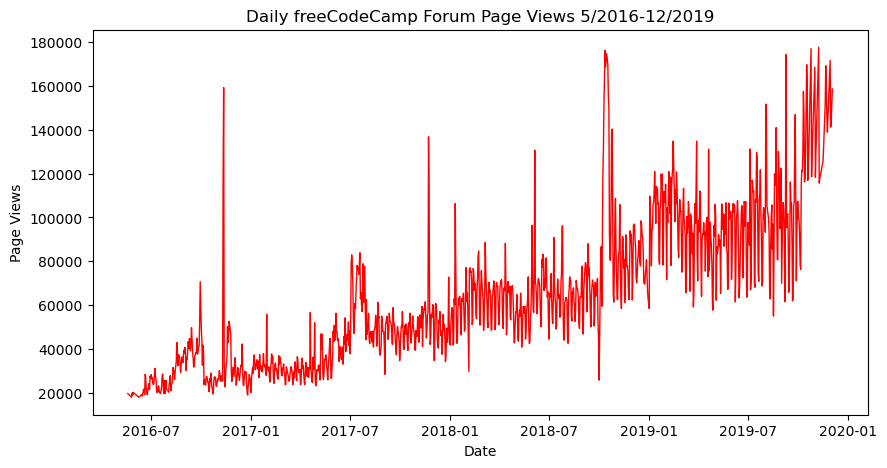

In [40]:
fig

In [41]:
df["month"] = df.index.month
df["year"] = df.index.year

C:\Users\hp\AppData\Local\Temp\ipykernel_24960\222480601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
C:\Users\hp\AppData\Local\Temp\ipykernel_24960\222480601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.index.year


In [42]:
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [46]:
df_bar = df.groupby(["year","month"])["value"].mean()


In [47]:
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [48]:
df_bar = df_bar.unstack()

In [49]:
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

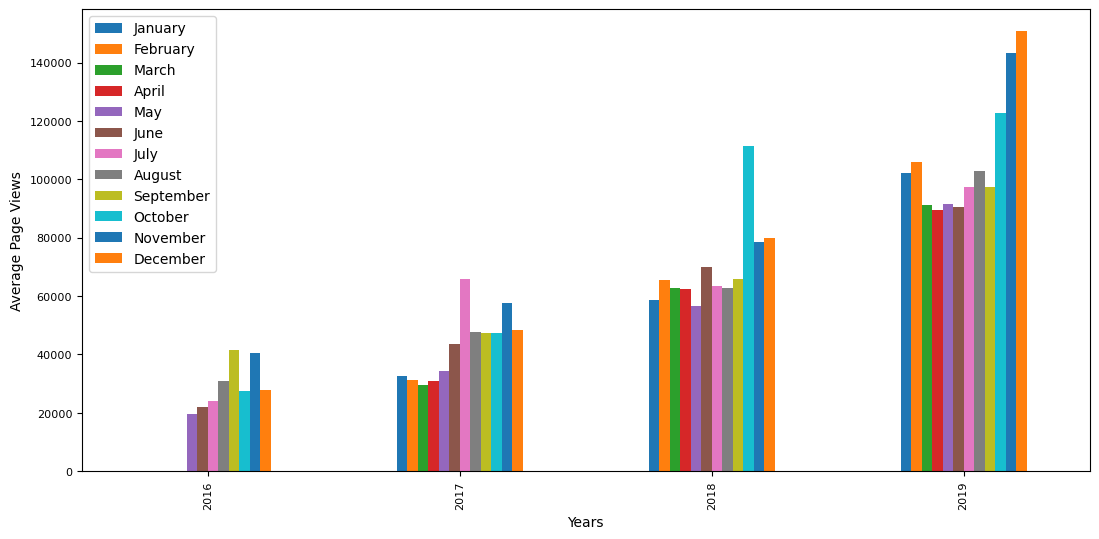

In [61]:
fig = df_bar.plot.bar(legend=True,figsize=(13,6),ylabel="Average Page Views",xlabel="Years").figure
plt.legend(["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

In [98]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num") 

In [99]:
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


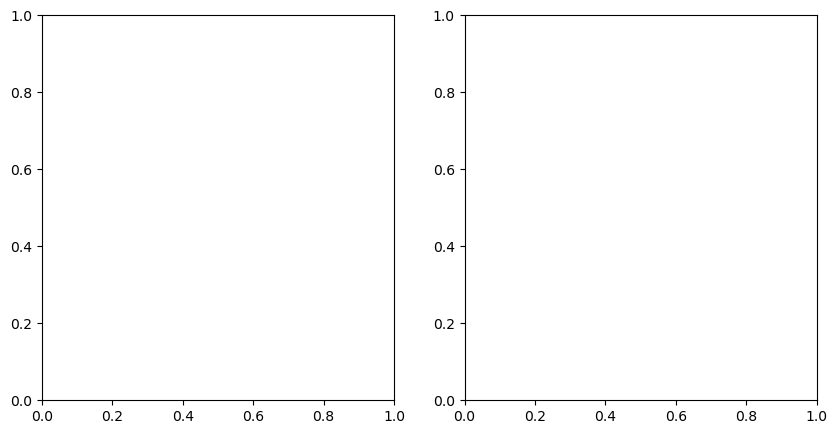

In [100]:

fig,axes = plt.subplots(nrows = 1,ncols=2,figsize = (10,5))


In [101]:
axes[0]= sns.boxplot(x=df_box["year"],y=df_box["value"],ax=axes[0])
axes[1]= sns.boxplot(x=df_box["month"],y=df_box["value"],ax=axes[1])

In [102]:
axes[0].set_title("Year-wise Box Plot(Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

Text(4.444444444444452, 0.5, 'Page Views')

In [103]:
axes[1].set_title("Month-Wise Box Plot (seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page views")

Text(427.1717171717171, 0.5, 'Page views')

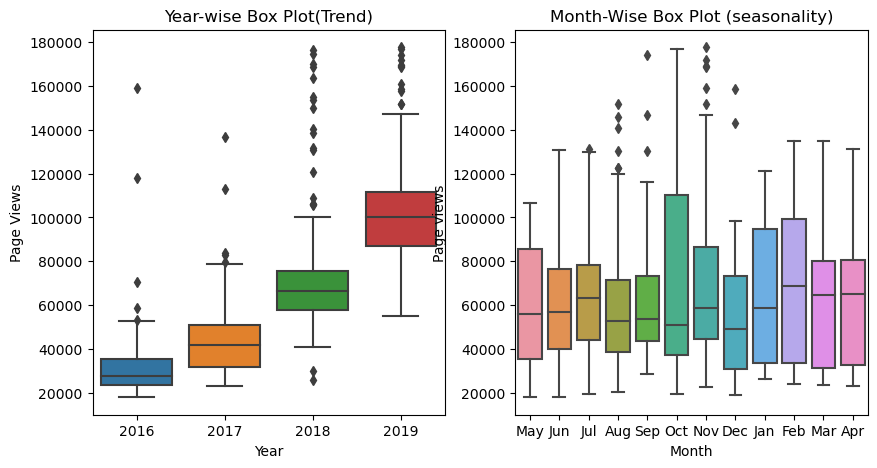

In [104]:
fig